# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country_code = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list with country code
    if city not in cities:
        city_country_code = f"{city},{country_code}"
        cities.append(city_country_code)
        
# Print the city count to confirm sufficient count
len(cities)

1500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
with open(output_data_file, "w", newline="") as csvfile:
    writer = csv.writer(csvfile, delimiter=",",quotechar=" ", quoting=csv.QUOTE_MINIMAL)
    head_str = f"city_id, city_name, country_code, lat, lon, cloudness, wind_speed, Max_temperature, humidity, date "
    writer.writerow([ head_str])
    count = 0

    for city in cities:
        count = count + 1
        print(f"count:{count}")
        if count > 600:
            break
        url_str = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=Imperial&APPID={api_keys.api_key}"
        response = requests.get(url_str)
        data = response.json()  
        time.sleep(2)
        print(url_str)
        try:
            line_str=f'{data["id"]}, {data["name"]}, {data["sys"]["country"]}, \
        {data["coord"]["lat"]}, {data["coord"]["lon"]}, \
         {data["clouds"]["all"]}, {data["wind"]["speed"]}, {data["main"]["temp_max"]},\
        {data["main"]["humidity"]}, {data["dt"]} '
            writer.writerow([line_str])
        except:
            print("Error in accessing this city, leave this city: {city}")
        
csvfile.close()

count:1
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
Error in accessing this city, leave this city: {city}
count:2
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk,ru&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:3
http://api.openweathermap.org/data/2.5/weather?q=mollendo,pe&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:4
http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:5
http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:6
http://api.openweathermap.org/data/2.5/weather?q=bonthe,sl&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:7
http://api.openweathermap.org/data/2.5/weather?q=east london,za&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:8
http://api.openweathermap.org/data/2.5/weather?q=souillac,mu&units=Imper

http://api.openweathermap.org/data/2.5/weather?q=skeldon,gy&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:65
http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:66
http://api.openweathermap.org/data/2.5/weather?q=beloha,mg&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:67
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:68
http://api.openweathermap.org/data/2.5/weather?q=salalah,om&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:69
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:70
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
Error in accessing this city, leave this city: {city}
count:71
http://api.openweathermap.org/data/2.5/weather?q=samusu,ws&units=Imperial&APPID=d9e2

http://api.openweathermap.org/data/2.5/weather?q=kavaratti,in&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:127
http://api.openweathermap.org/data/2.5/weather?q=narsaq,gl&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:128
http://api.openweathermap.org/data/2.5/weather?q=nome,us&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:129
http://api.openweathermap.org/data/2.5/weather?q=butaritari,ki&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:130
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:131
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:132
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
Error in accessing this city, leave this city: {city}
count:133
http://api.openweathermap.org/data/2.5/weather?q=gambo,ca&units=Imperial&

http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:189
http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:190
http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:191
http://api.openweathermap.org/data/2.5/weather?q=brae,gb&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:192
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:193
http://api.openweathermap.org/data/2.5/weather?q=vanimo,pg&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:194
http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:195
http://api.openweathermap.org/data/2.5/weather?q=kalmunai,lk&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:196
http://

http://api.openweathermap.org/data/2.5/weather?q=ilulissat,gl&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:252
http://api.openweathermap.org/data/2.5/weather?q=beyneu,kz&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:253
http://api.openweathermap.org/data/2.5/weather?q=brae,gb&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:254
http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:255
http://api.openweathermap.org/data/2.5/weather?q=biltine,td&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:256
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
Error in accessing this city, leave this city: {city}
count:257
http://api.openweathermap.org/data/2.5/weather?q=almaznyy,ru&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:258
http://api.openweathermap.org/data/2.5/weather?q=acapulco,mx&units=Imperial&APPI

http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:315
http://api.openweathermap.org/data/2.5/weather?q=tsihombe,mg&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
Error in accessing this city, leave this city: {city}
count:316
http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:317
http://api.openweathermap.org/data/2.5/weather?q=lakatoro,vu&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:318
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut,gl&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
Error in accessing this city, leave this city: {city}
count:319
http://api.openweathermap.org/data/2.5/weather?q=yulara,au&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:320
http://api.openweathermap.org/data/2.5/weather?q=brigantine,us&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:321
htt

http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:376
http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:377
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou,mr&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:378
http://api.openweathermap.org/data/2.5/weather?q=georgetown,sh&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:379
http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:380
http://api.openweathermap.org/data/2.5/weather?q=palmas bellas,pa&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:381
http://api.openweathermap.org/data/2.5/weather?q=dromolaxia,cy&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:382
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
Erro

http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:438
http://api.openweathermap.org/data/2.5/weather?q=tocopilla,cl&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:439
http://api.openweathermap.org/data/2.5/weather?q=airai,pw&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
Error in accessing this city, leave this city: {city}
count:440
http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:441
http://api.openweathermap.org/data/2.5/weather?q=jesup,us&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:442
http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:443
http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:444
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=Imperi

http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:499
http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:500
http://api.openweathermap.org/data/2.5/weather?q=ust-nera,ru&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:501
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:502
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:503
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:504
http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:505
http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:

http://api.openweathermap.org/data/2.5/weather?q=normandin,ca&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:561
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:562
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:563
http://api.openweathermap.org/data/2.5/weather?q=tura,ru&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:564
http://api.openweathermap.org/data/2.5/weather?q=bethel,us&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:565
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:566
http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:567
http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=Imperial&APPID=d9e26daf94ab1bf9197ea2dbd69e1d03
count:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
df_cities = pd.read_csv(output_data_file, encoding="ISO-8859-1")

In [74]:
df_cities.head()
#print(df_cities.dtypes)
#df_cities['lat']


,city_id,city_name,country_code,lat,lon,cloudness,wind_speed,Max_temperature,humidity,date
0,2121385,Severo-Kurilsk,RU,50.68,156.12,0,4.36,23.35,100,1545515446
1,3934707,Mollendo,PE,-17.03,-72.02,8,3.91,75.86,52,1545515448
2,2163355,Hobart,AU,-42.88,147.33,75,12.75,62.60,51,1545514200
3,2074865,Carnarvon,AU,-24.87,113.63,80,6.93,73.40,94,1545512400
4,2409914,Bonthe,SL,7.53,-12.50,8,5.93,86.17,58,1545515454


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5,0,'Latitude')

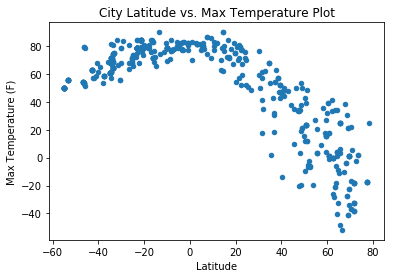

In [75]:

df_cities.plot.scatter(x=3, y=7)
plt.title("City Latitude vs. Max Temperature Plot")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

In [76]:
plt.savefig("Latitude_vs_Max_Temperature.png")

#### Latitude vs. Humidity Plot

Text(0.5,0,'Latitude')

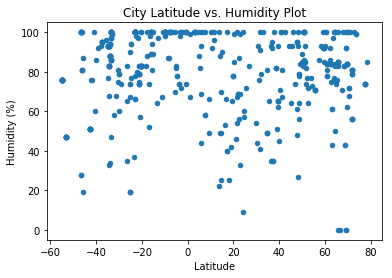

In [77]:
# Set textual properties
df_cities.plot.scatter(x=3, y=8)
plt.title("City Latitude vs. Humidity Plot")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

In [78]:
plt.savefig("Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

Text(0.5,0,'Latitude')

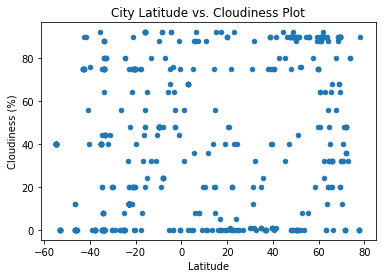

In [79]:
# Set textual properties
df_cities.plot.scatter(x=3, y=5)
plt.title("City Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

In [80]:
plt.savefig("Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

Text(0.5,0,'Latitude')

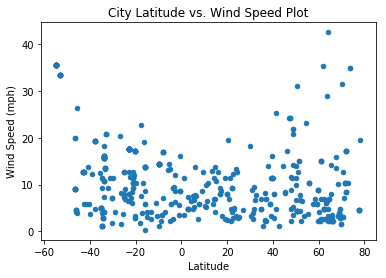

In [81]:
# Set textual properties
df_cities.plot.scatter(x=3, y=6)
plt.title("City Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

In [82]:
plt.savefig("Latitude_vs_Wind_Speed.png")